# Advanced usage

_DearEIS_ is primarily intended to be used via the graphical user interface (GUI).
However, it is also possible to make use of _DearEIS_ projects that have been created via the GUI in e.g. Python scripts or Jupyter notebooks.
This makes it possible to first work with the data using the GUI (e.g. validate experimental data and then fit an equivalent circuit) and then use a Python script to plot the results.
The ability to work with _DearEIS_ projects in Python scripts also means that batch processing of results can be utilized to e.g. easily generate up-to-date tables and figures that are then included in a LaTeX document.

## Setup in Jupyter

Below is a an example of how one might prepare a Jupyter notebook to make use of _DearEIS_.

In [1]:
# This is just an example of how to prepare the Jupyter notebook for plotting and is not strictly necessary.
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = [12, 6]

In [2]:
from deareis import *
from pyimpspec.plot.mpl import *  # pyimpspec's plotting functions can be used to visualize the results.

## Loading a project

Projects can be loaded using the `from_file` method.

In [3]:
path: str = "./example-project.json"
project: Project = Project.from_file(path)

## Plotting various parts of a project

The `Project` class has methods for getting the data sets, Kramers-Kronig test results, equivalent circuit fitting results, and simulated spectra.
The easiest way to plot these are by using _pyimpspec_'s plotting functions.
However, the various objects do have methods such as `get_nyquist_data` and `get_bode_data` that can be used to obtain _numpy_ arrays containing the data required to create custom plots.

### Data sets

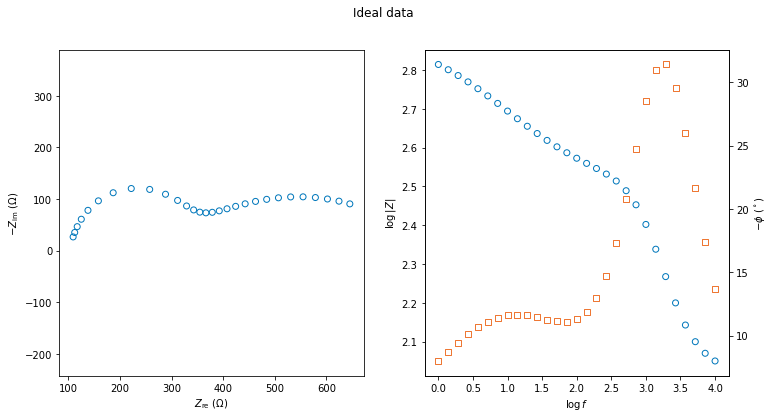

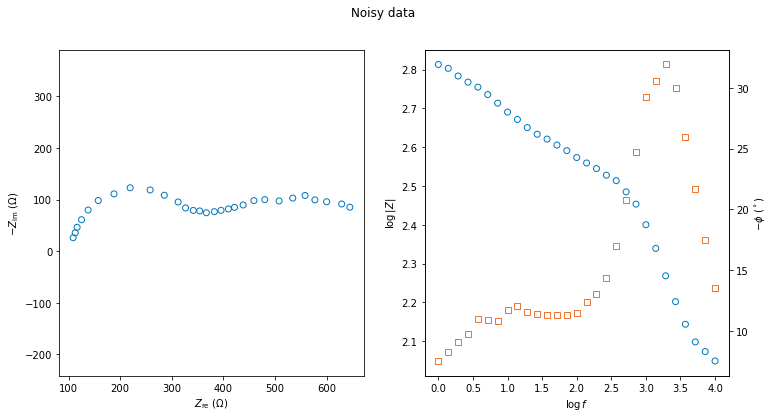

In [4]:
data: DataSet
for data in project.get_datasets():
    fig, axes = plot_data(data)

### Kramers-Kronig test results

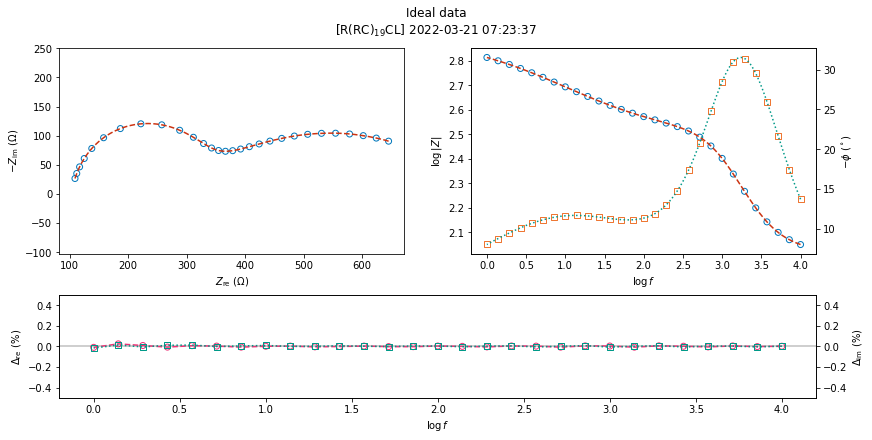

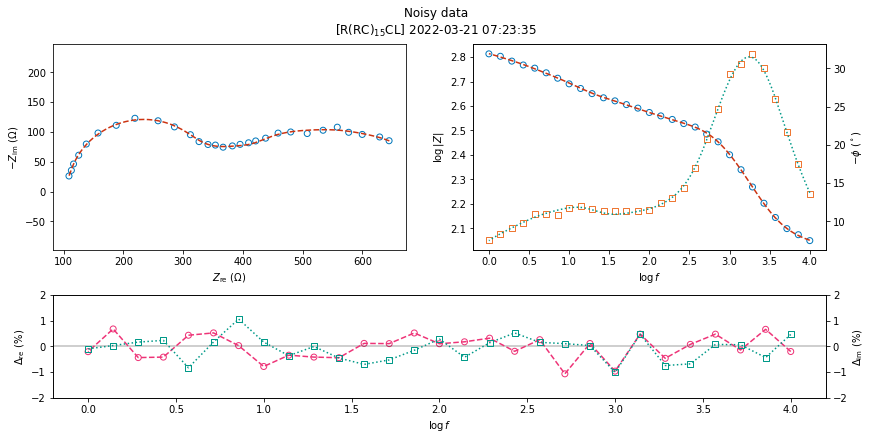

In [5]:
data: DataSet
for data in project.get_datasets():
    # Plot the Kramers-Kronig test results for the current DataSet object.
    test: TestResult
    for test in project.get_tests(data):
        fig, axes = plot_fit(test, data)

### Fit results

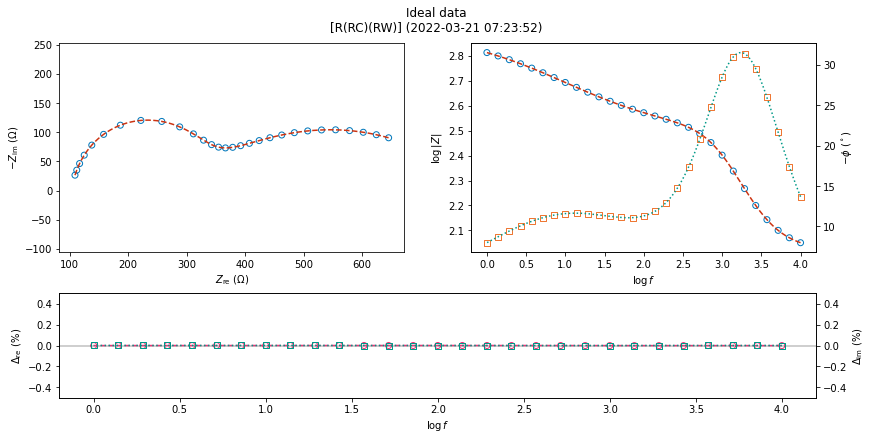

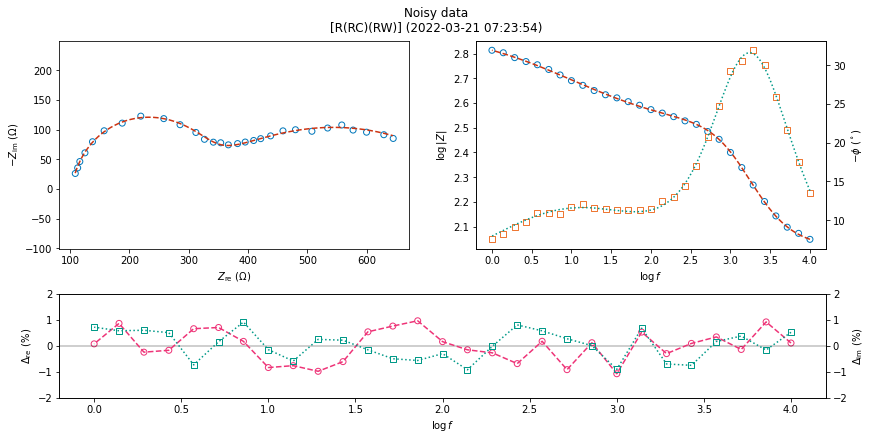

In [6]:
data: DataSet
for data in project.get_datasets():
    # Plot the equivalent circuit fitting results for the current DataSet object.
    fit: FitResult
    for fit in project.get_fits(data):
        fig, axes = plot_fit(fit, data)

### Simulations

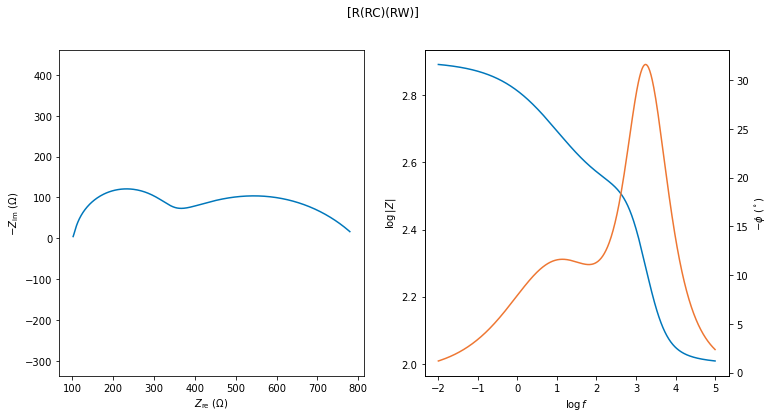

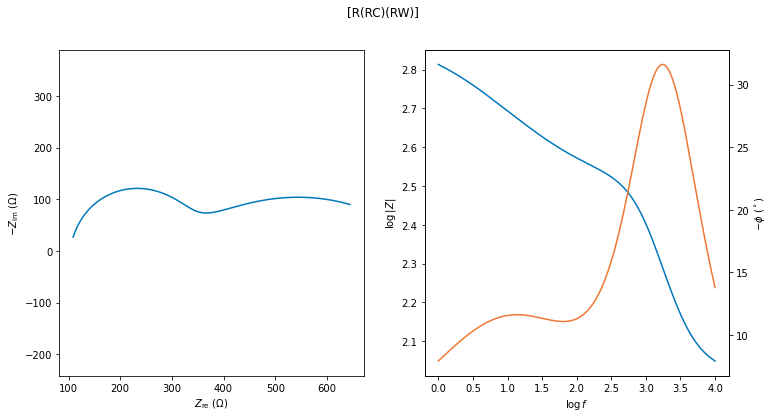

In [7]:
# Plot the simulated circuits.
sim: SimulationResult
for sim in project.get_simulations():
    plot_circuit(sim.circuit, sim.get_frequency(100))

### Plots

Not yet fully implemented.